# Transpose convolution: Upsampling

In section 10.5.3, we discussed how transpose convolutions are can be used to upsample a lower resolution input into a higher resolution output. This notebook contains fully functional PyTorch code for the same. 

In [1]:
import matplotlib.pyplot as plt
import torch
import math

First, let's look at how transpose convolution works on a simple input tensor. Then we will look at a real image. For this purpose, we will consider the example described in Figure 10.17. The input is a 2x2 array as follows:
$$
x = \begin{bmatrix}
5 & 6 \\
7 & 8 \\
\end{bmatrix}
$$
and the transpose convolution kernel is also a 2x2 array as follows
$$
w = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
$$

Transpose convolution with stride 1 results in a 3x3 output as shown below. 

# Transpose conv 2D with stride 1

In [2]:
x = torch.tensor([
        [5.,  6.],
        [7., 8.]
    ])
w = torch.tensor([
        [1., 2.],
        [3., 4.]
    ])

x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

transpose_conv2d = torch.nn.ConvTranspose2d(1, 1, kernel_size=2, stride=1, bias=False)
# set weights of the TransposeConv2d object
with torch.no_grad():
    transpose_conv2d.weight = torch.nn.Parameter(w)

with torch.no_grad():
    y = transpose_conv2d(x)

y

tensor([[[[ 5., 16., 12.],
          [22., 60., 40.],
          [21., 52., 32.]]]])

# Transpose conv 2D with stride 2

In the above example, we did not get a truly upsampled version of the input because we used a kernel stride of 1. Thei increase in resolution from 2 to 3 comes because of padding. Now, let's see how to truly upsample the image - we will run transpose convolution with stride 2. The step by step demonstration of this is shown in Figure 10.18. As you  can see below, we obtained a 4z4 output. This is because we used a kernel a stride 2. Using a larger stride with further increase the output resolution

In [3]:
x = torch.tensor([
        [5.,  6.],
        [7., 8.]
    ])
w = torch.tensor([
        [1., 2.],
        [3., 4.]
    ])

x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

transpose_conv2d = torch.nn.ConvTranspose2d(1, 1, kernel_size=2, stride=2, bias=False)
# set weights of the TransposeConv2d object
with torch.no_grad():
    transpose_conv2d.weight = torch.nn.Parameter(w)

with torch.no_grad():
    y = transpose_conv2d(x)

y

tensor([[[[ 5., 10.,  6., 12.],
          [15., 20., 18., 24.],
          [ 7., 14.,  8., 16.],
          [21., 28., 24., 32.]]]])

Now, let's take a sample image and see how the input compares to the output post transpose convolution with stride 2.

In [4]:
import cv2
x = torch.tensor(cv2.imread("./Figures/dog2.jpg", 0), dtype=torch.float32)

w = torch.tensor([
        [1., 1.],
        [1., 1.]
    ])

x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

transpose_conv2d = torch.nn.ConvTranspose2d(1, 1, kernel_size=2, 
                                            stride=2, bias=False)
# set weights of the TransposeConv2d object
with torch.no_grad():
    transpose_conv2d.weight = torch.nn.Parameter(w)

with torch.no_grad():
    y = transpose_conv2d(x)

y

tensor([[[[ 88.,  88., 100.,  ..., 221., 220., 220.],
          [ 88.,  88., 100.,  ..., 221., 220., 220.],
          [ 85.,  85., 114.,  ..., 218., 217., 217.],
          ...,
          [172., 172., 165.,  ..., 172., 173., 173.],
          [184., 184., 178.,  ..., 172., 172., 172.],
          [184., 184., 178.,  ..., 172., 172., 172.]]]])

In [5]:
print("Input shape:", x.shape)
print("Output shape:", y.shape)

Input shape: torch.Size([1, 1, 168, 300])
Output shape: torch.Size([1, 1, 336, 600])


As expected, the output is twice the size of the input. The images below should make this clear

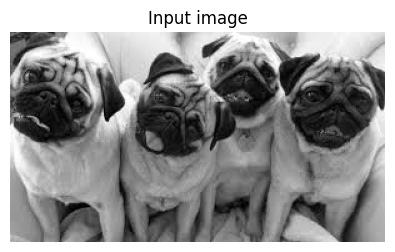

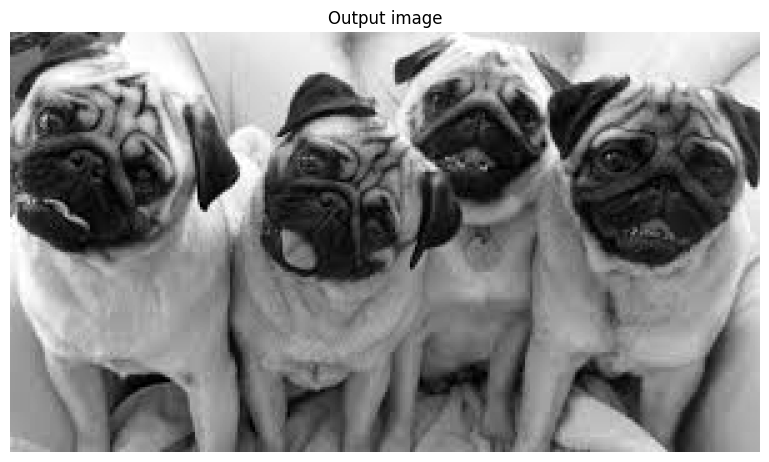

In [6]:
def display_image_in_actual_size(im_data, title):

    dpi = 80
    height, width = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')
    ax.set_title(title)

    plt.show()

display_image_in_actual_size(x.squeeze().squeeze(), "Input image")
display_image_in_actual_size(y.squeeze().squeeze(), "Output image")